<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages-&amp;-Data" data-toc-modified-id="Import-Packages-&amp;-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages &amp; Data</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Filter-Data-for-Los-Angeles" data-toc-modified-id="Filter-Data-for-Los-Angeles-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filter Data for Los Angeles</a></span></li></ul></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Drop-Columns" data-toc-modified-id="Drop-Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drop Columns</a></span></li><li><span><a href="#Reshape-from-Wide-to-Long-Format" data-toc-modified-id="Reshape-from-Wide-to-Long-Format-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Reshape from Wide to Long Format</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Plot-Home-Value-Time-Series" data-toc-modified-id="Plot-Home-Value-Time-Series-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot Home Value Time Series</a></span><ul class="toc-item"><li><span><a href="#All-Zip-Codes-Individually" data-toc-modified-id="All-Zip-Codes-Individually-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>All Zip Codes Individually</a></span></li><li><span><a href="#All-Zip-Codes-Averaged" data-toc-modified-id="All-Zip-Codes-Averaged-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>All Zip Codes Averaged</a></span></li><li><span><a href="#Observations-&amp;-Discussion" data-toc-modified-id="Observations-&amp;-Discussion-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Observations &amp; Discussion</a></span></li></ul></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Seasonality</a></span><ul class="toc-item"><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#Decomposition" data-toc-modified-id="Decomposition-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Decomposition</a></span></li><li><span><a href="#Seasonal-Decomposition-Plots" data-toc-modified-id="Seasonal-Decomposition-Plots-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Seasonal Decomposition Plots</a></span></li></ul></li></ul></li><li><span><a href="#SARIMAX-Modeling" data-toc-modified-id="SARIMAX-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SARIMAX Modeling</a></span><ul class="toc-item"><li><span><a href="#Select-Best-Parameters" data-toc-modified-id="Select-Best-Parameters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Select Best Parameters</a></span><ul class="toc-item"><li><span><a href="#Gridsearch" data-toc-modified-id="Gridsearch-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Gridsearch</a></span></li></ul></li><li><span><a href="#Build-Model-w/Optimal-Parameters" data-toc-modified-id="Build-Model-w/Optimal-Parameters-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Build Model w/Optimal Parameters</a></span><ul class="toc-item"><li><span><a href="#Model-West-Hollywood" data-toc-modified-id="Model-West-Hollywood-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Model West Hollywood</a></span></li><li><span><a href="#Model-Century-City" data-toc-modified-id="Model-Century-City-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Model Century City</a></span></li><li><span><a href="#Model-LA-Averaged" data-toc-modified-id="Model-LA-Averaged-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Model LA Averaged</a></span></li><li><span><a href="#Observations-&amp;-Discussion" data-toc-modified-id="Observations-&amp;-Discussion-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Observations &amp; Discussion</a></span></li></ul></li><li><span><a href="#Test-Model-On-Known-Data" data-toc-modified-id="Test-Model-On-Known-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Test Model On Known Data</a></span><ul class="toc-item"><li><span><a href="#One-step-Ahead-Forecast" data-toc-modified-id="One-step-Ahead-Forecast-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>One-step Ahead Forecast</a></span></li></ul></li><li><span><a href="#5-Year-Dynamic-Forecast" data-toc-modified-id="5-Year-Dynamic-Forecast-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>5 Year Dynamic Forecast</a></span></li></ul></li><li><span><a href="#Calculate-5-&amp;-10-Year-ROI" data-toc-modified-id="Calculate-5-&amp;-10-Year-ROI-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate 5 &amp; 10 Year ROI</a></span><ul class="toc-item"><li><span><a href="#Historic-Rolling-ROI" data-toc-modified-id="Historic-Rolling-ROI-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Historic Rolling ROI</a></span></li></ul></li><li><span><a href="#5-Year-Projected-ROI" data-toc-modified-id="5-Year-Projected-ROI-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>5 Year Projected ROI</a></span><ul class="toc-item"><li><span><a href="#Get-5-Year-Projections" data-toc-modified-id="Get-5-Year-Projections-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Get 5 Year Projections</a></span></li><li><span><a href="#Sort-Top-10-Zip-Codes" data-toc-modified-id="Sort-Top-10-Zip-Codes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Sort Top 10 Zip Codes</a></span><ul class="toc-item"><li><span><a href="#Print-Table-of-Top-10-Zip-Code-Metrics" data-toc-modified-id="Print-Table-of-Top-10-Zip-Code-Metrics-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Print Table of Top 10 Zip Code Metrics</a></span></li><li><span><a href="#Plot-Top-10-Zip-Codes" data-toc-modified-id="Plot-Top-10-Zip-Codes-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Plot Top 10 Zip Codes</a></span></li></ul></li><li><span><a href="#Plot-Top-10-Zip-Codes" data-toc-modified-id="Plot-Top-10-Zip-Codes-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Plot Top 10 Zip Codes</a></span></li><li><span><a href="#Remove-90067" data-toc-modified-id="Remove-90067-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Remove 90067</a></span></li><li><span><a href="#Plot-Historic-Values-for-Top-5-Zip-Codes" data-toc-modified-id="Plot-Historic-Values-for-Top-5-Zip-Codes-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Plot Historic Values for Top 5 Zip Codes</a></span></li><li><span><a href="#Models-&amp;-5-Year-Dynamic-Forecast-for-Top-5-Zip-Codes" data-toc-modified-id="Models-&amp;-5-Year-Dynamic-Forecast-for-Top-5-Zip-Codes-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Models &amp; 5 Year Dynamic Forecast for Top 5 Zip Codes</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#5-Year-Investment-Projections" data-toc-modified-id="5-Year-Investment-Projections-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>5-Year Investment Projections</a></span></li><li><span><a href="#Market-Volatility-&amp;-Considerations" data-toc-modified-id="Market-Volatility-&amp;-Considerations-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Market Volatility &amp; Considerations</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Future Work</a></span></li></ul></li></ul></div>

# Import Packages & Data

## Import Packages

In [32]:
### Import Packages ###

# Filter warnings
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import matplotlib
%matplotlib inline

from sklearn.metrics import mean_squared_error
import math 

import itertools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

## Import Data

In [2]:
# Import data
data = pd.read_csv('up_to_date_zillow_data.csv')
df = pd.DataFrame(data)

# Preview data
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1416272.0,1409421.0,1407017.0,1412042.0,1414135.0,1415095.0,1408966.0,1401018.0,1389676.0,1384859.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,358776.0,...,957541.0,956310.0,954994.0,954985.0,956480.0,958337.0,959091.0,958959.0,958378.0,959519.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1669612.0,1663472.0,1659302.0,1662263.0,1662774.0,1658055.0,1649411.0,1641047.0,1639442.0,1635311.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200271.0,...,335925.0,335929.0,336035.0,335760.0,335937.0,336360.0,337373.0,338225.0,338713.0,338889.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,540023.0,...,1187731.0,1185049.0,1183037.0,1182915.0,1185225.0,1187244.0,1188570.0,1188375.0,1189551.0,1192253.0


## Filter Data for Los Angeles

In [3]:
# Filter for Los Angeles
df_LA = df[df['City'] == 'Los Angeles']

Sort by SizeRank to see the most populous regions. (This is my guess as it's definition was not provided by Zillow and through some online research, while mentioned a good amount of times, only one person had guessed that it may be an urbanization ranking.)

In [4]:
df_LA.sort_values(by='SizeRank', na_position='first').head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
43,96027,44,90046,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,177088.0,...,1843470.0,1853651.0,1868109.0,1880135.0,1900896.0,1918719.0,1936573.0,1948696.0,1963133.0,1982231.0
98,96015,99,90034,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,251418.0,...,1398417.0,1404092.0,1415063.0,1427241.0,1445321.0,1463208.0,1478076.0,1485024.0,1492268.0,1515853.0
114,96025,115,90044,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,126593.0,...,458596.0,461738.0,466106.0,470368.0,476367.0,482154.0,488178.0,492045.0,496175.0,502824.0
135,96007,136,90026,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,107147.0,...,985578.0,993267.0,1004494.0,1015062.0,1028334.0,1040727.0,1050599.0,1054837.0,1053531.0,1054874.0
172,96047,174,90066,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,237560.0,...,1489995.0,1493731.0,1501840.0,1513381.0,1534242.0,1552524.0,1569932.0,1579845.0,1593031.0,1624438.0


The top two in size rank are:

(1) 90046, which represents West Hollywood and the Hollywood Hills neighborhoods

(2) 90034, which includes the Palms, Westdale and La Cienega neighborhoods. 

West Hollywood and the Hollywood Hills are very very populous and affluent neighborhoods in the Greater Los Angeles area, with West Hollywood being the most densley populated. A just under 4,000 square foot penthouse apartment at the Edition on Sunset Blvd. in West Hollywood was listed on Zillow at $18.9M in 2020. 

There are also many apartment buildings and some densley packed bungalow style homes mixed with some more modern style homes.

Further into the Hollywood Hills homes become more spaced out and are larger single family homes. 

# Clean Data 

## Drop Columns

It looks like 'RegionName' is the zipcode and 'RegionID' is extra information that we don't need. So I will go ahead and drop that column.

In [5]:
# Columns to drop
to_drop = ['RegionID','RegionType','SizeRank','StateName']

# Drop
df_LA = df_LA.drop(to_drop, axis=1)

# Preview
df_LA.head(1)

,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
43,90046,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,177088.0,177788.0,177914.0,178037.0,178157.0,...,1843470.0,1853651.0,1868109.0,1880135.0,1900896.0,1918719.0,1936573.0,1948696.0,1963133.0,1982231.0


## Reshape from Wide to Long Format

Let's go ahead and melt the data from wide to long format so we can get it into time series format for modeling. 

In [6]:
# Define function to melt data
def melt_data(df, group=False):
    '''
    Melt data from wide to long format.
    
    Input:
        df : dataframe with wide format time series data.
        group : groups data by time and averages all zip codes.
            default=False.
            
    Output:
        Returns melted dataframe if group=False.
        Returns melted time series average of all zip codes if
            group=True.
    '''
    # Melt data
    melted = pd.melt(df, 
                     id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], 
                     var_name='time')
    # Create time column & set to datetime format
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    # Drop NaNs
    melted = melted.dropna(subset=['value'])
    
    # If averaging all zip codes
    if group:
        return melted.groupby('time').aggregate({'value':'mean'})
    # If keeping zip code data
    else:
        return melted

Now we'll create two time series:

(1) A dataframe that contains the time series data as well as the zip codes, city and state.

(2) A time series with all zip codes averaged for LA.

In [7]:
### Melt data - zip codes ###
df_LA_melt = melt_data(df_LA)

# Sort by region name, then time to separate zip codes
df_LA_melt_sort = df_LA_melt.sort_values(by=['RegionName','time'])

# Set index frequency format to month
df_LA_melt_sort.asfreq('m').index

### Melt data - all zip codes averaged ###
ts_LA = melt_data(df_LA, group=True)

# Set index frequency format to month
ts_LA.asfreq('m').index;

Let's see how many zip codes and data points we have here.

In [8]:
# See how many zip codes we have in the data
print(f"n-zipcodes: {df_LA_melt_sort['RegionName'].nunique()}")

# See how many data points we have 
print(f'n-datapoints: {len(df_LA_melt_sort)}')

n-zipcodes: 100
n-datapoints: 28727


There are 100 different zipcodes in our dataset for Los Angeles. And for those 100 zipcodes we have 28,727 data points. That's a good amount, giving an average of about 287 data points per zip code. Newer zip codes may have fewer datapoints. 

# EDA

## Plot Home Value Time Series

Let's take a look at the time series values for all 100 zip codes. These will most likely be dense on the plot, but we will be able to see any overall trends.

A note is that the data for this time series are already smoothed by Zillow. 

We'll create a function first so we can replicate this later when we've narrowed down our top zip codes for investing.

In [216]:
# Grab a list of the zip codes to iterate through
zipcodes = df_LA_melt_sort['RegionName'].unique()

# Define function to plot time series for each zip code

def plot_zipcodes(df, zipcodes, legend=False):
    '''
    Creates a time series plot of home sale values by zip code.
    
    Input:
    df : Data frame of time series data.
    zipcodes : List of zipcodes to iterate through. 
    legend : To add a legend. Default is False for when number of 
    zip codes in data set is high.
    
    Output:
    Returns a time series plot of home sale values by zip code.
    '''

    # Define figure
    plt.figure(figsize=(16,8))

    # Increase figure's font sizes
    matplotlib.rcParams.update({'font.size': 18})

    # Create empty list of labels
    labels = []

    # Iterate through zip codes and plot
    for zipcode in zipcodes:
        df_zip = df[df['RegionName'] == zipcode]
        plt.plot(df_zip['time'], df_zip['value'], label=zipcode)
        labels.append(zipcode)

    # Set y-lim close to max for easy visual comparison with future plots
    # plt.ylim(0,4250000)

    # Title & x & y labels
    plt.title('Los Angeles Median Home Sale Prices Per Zip Code')
    plt.ylabel('Median Home Sale Prices (USD)'')
    plt.xlabel('Date')
    
    if legend:
        plt.legend(loc="upper left")
    
    # Save figure
    plt.savefig('home_sale_prices.png', dpi=500, orientation='landscape', bbox_inches='tight')
    
    plt.show()

### All Zip Codes Individually

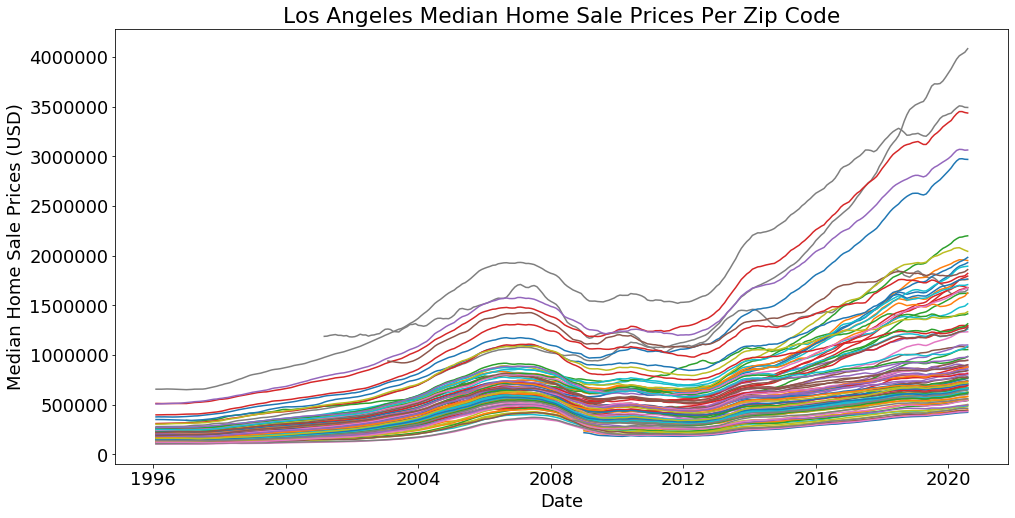

In [217]:
# Plot home value time series by zip codes
plot_zipcodes(df_LA_melt_sort, zipcodes)

### All Zip Codes Averaged

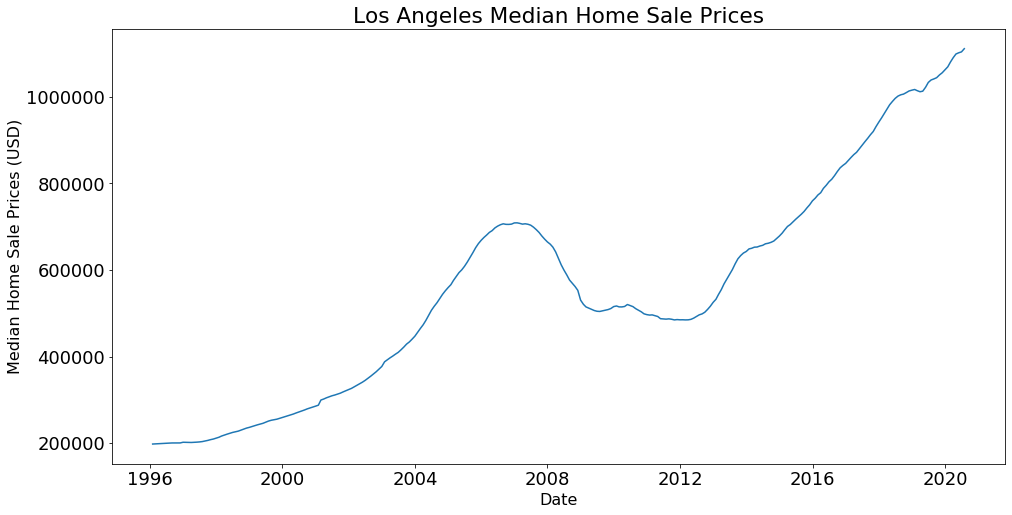

In [218]:
# Plot home value time series for all zip codes averaged

# Define figure
plt.figure(figsize=(16,8))

# Plot
plt.plot(ts_LA)

# Set y-lim to match above plot
# plt.ylim(0,4250000)

# Title & x & y labels
plt.title('Los Angeles Median Home Sale Prices')
plt.ylabel('Median Home Sale Prices (USD)', fontsize=16)
plt.xlabel('Date', fontsize=16)

plt.show()

We can see the 2008 housing bubble much more dramatically in the averaged plot vs the plot showing the granularity of each 100 zip codes.

This is because the y-lim here is much lower than in the above plot. When the y-lim is set to match, it appears much more level. I will leave it this way for now, but leave the y-lim code coded out for easy reference.

### Observations & Discussion

**Data**

This dataset runs from January 31st of 1996 through July 31st of 2020, the most current data available on Zillow.

**Zipcodes**

We can see a similar trend amongst all of our zipcodes. A few seem to be much higher than others, representing the more affluent neighborhoods. 

This data set represents median housing sale prices, so they could also include multifamily housing units as well, which would sell for a higher price than nearby single family homes. I imagine though overall the median would be representative and not skewed by this as density tends to be mixed (single family homes and multifamily homes), and sometimes in multifamily homes the individual apartments or condos are listed for sale individually. 

**Housing Bubble**

We can see the housing bubble of 2008 in the data here. Home sale values start increasing rapidly in 2004, then max out late 2006/early 2007 and begin to dip to a min in around 2009. Some zipcodes slowly drop even lower for the next couple of years. Prices slowly begin to recover, reaching max bubble values in about 2013, 6 years after the bubble burst. 

Since the market is volatile and bubbles are somewhat unpredictable and do occur, with another one being anticipated in 2020-2022, I am going to leave this data in the data set. 

## Seasonality

### Discussion

I conducted research and found that there is seasonality in home sales, so I am going to use SARIMAX for our time series modeling, which integrates seasonality. 

**Seasonality**

According to the National Association of Realtors, the number of home sales increases significantly in the spring, with home sales increasing by 34% in February and March. 

Sales continue upward with the busiest home selling months being May through August, accounting for 40% of United States annual home sales volume. 

The slowest months are November through February, with January being the slowest. 

Prices of homes slightly increase during surge months when the demand in the market is higher. Therefore, selling homes during these peak times could prove to be advantageous for maximizing profits.

Reference: https://www.nar.realtor/blogs/economists-outlook/seasonality-in-the-housing-market

**Volatility**

A note about market volatility. Since the strategy we are focused on here is buy and hold, if and when there is a housing bubble, it is best to continue to hold during this time. While having a mortgage does create a liability, history shows that during a recession or related housing bubble, the rental market is not as affected as the housing market. 

I also recommend comparing our time series data and projections to the rental market data, which is also available on Zillow. 

Reference: https://www.forbes.com/sites/forbesrealestatecouncil/2020/01/02/how-will-a-recession-affect-my-rental-properties/#a4b70b45c70f

### Decomposition

We can also decompose our time series to look for seasonality.

First I'm going to define a function here to be able to subset our time series dataset by zipcode, so we can look at just one zip code at a time. 

In [13]:
# Define function to create individual time series by zipcode
def zipcode_ts(df, zipcode):
    '''
    '''
    zipcode_ts = df[df['RegionName'] == zipcode]
    zipcode_ts.index = zipcode_ts['time']
    to_drop = ['RegionName','City','State','Metro','CountyName','time']
    zipcode_ts = zipcode_ts.drop(to_drop, axis=1)
    return zipcode_ts 

Now we'll create two time series; one for West Hollywood and one for Century City.

I chose these two because West Hollywood ranked as the highest size rank and Century City ranked as the highest projected ROI (however with a very large confidence interval). 

We could have picked any zip codes randomly, however I'm interested in seeing these two specifically.

In [92]:
# West Hollywood (highest rank / most populous)
WeHo = zipcode_ts(df_LA_melt_sort, 90046)

# Century City (highest projected ROI, but with large error as well)
CentCity = zipcode_ts(df_LA_melt_sort, 90067)

### Seasonal Decomposition Plots

               Seasonal Decomposition - WeHo


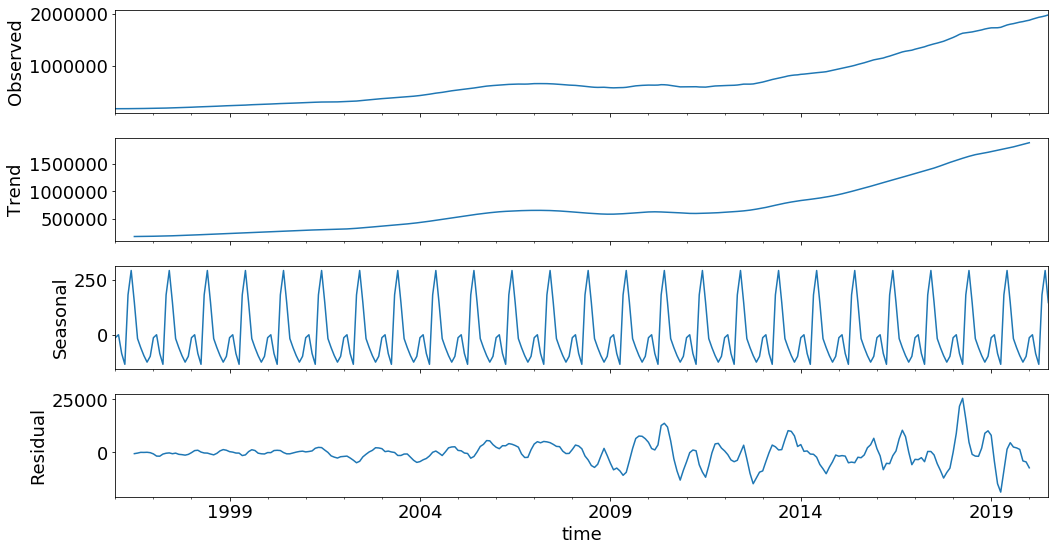

               Seasonal Decomposition - LA


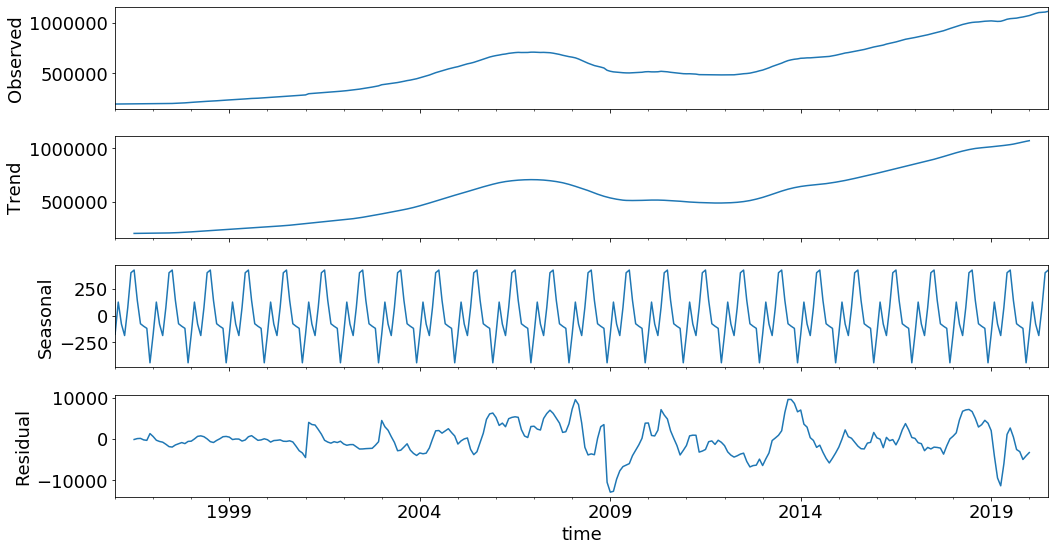

In [220]:
# Make font sizes smaller for decomposition plots
matplotlib.rcParams.update({'font.size': 18})

# Decompose time series data for West Hollywood
print('               Seasonal Decomposition - WeHo')
seasonal_decompose(WeHo).plot()

# To prevent duplicate plots 
plt.show()

# Decompose time series data for all of LA
print('               Seasonal Decomposition - LA')
seasonal_decompose(ts_LA).plot()

# Save figure
plt.savefig('seasonal_decomp_LA.png', dpi=500, orientation='landscape', bbox_inches='tight')

# To prevent duplicate plots 
plt.show()

We can see the seasonality clearly here in our data and as discussed above, which is why we're using SARIMAX for modeling, to include seasonality. 

We can also see the overall upward trend, including the dip from the 2008 housing bubble. 

# SARIMAX Modeling

## Select Best Parameters 

Select best parameters for p, d & q according to the lowest BIC value.

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Gridsearch

Conduct gridsearch to find optimal values for (p,d,q) and (P,D,Q,s) ranked by lowest BIC. I tested this for two different individual zip codes, West Hollywood and Century City, and each yielded different results.

This code takes quite a while to run, so running it for all 100 zip codes would take far longer than what would be an efficient use of time. Therefore I chose to run it on the time series for all zip codes' median home sale values averaged.

The results won't be perfect for all zip codes, however they will be time efficient and yield the most optimal results considering time and efficiency. 

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best BIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_LA,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            freq='M')

            output = mod.fit(maxiter=100) 
            ans.append([comb, combs, output.bic])
            print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
        except:
            continue

Select parameters that result in the lowest BIC value.

In [ ]:
# Find the parameters with minimal BIC value

# Convert into dataframe
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

# Sort and print top 5 combinations
ans_df.sort_values(by=['bic'],ascending=True)[0:5]

## Build Model w/Optimal Parameters

Now we're going to build our model with the optimal parameters from the gridsearch we ran. Since the lowest value resulted in d not being significan for WeHo, CentCity or LA - averaged, I printed out the top 5 order & seasonal order combinations, and I'm going to test them each out to see which yields the best result.

*Optimal for West Hollywood only*: order=(0, 2, 1), seasonal_order=(1, 1, 2, 12)

*Optimal for all of LA Averaged*: order=(2, 2, 1), seasonal_order=(2, 2, 1, 12)

First we'll create a function, so we can replicate for different subsets.

In [16]:
# Define function to build SARIMAX model, print summary and output diagnostic plots
def sarimax(ts, order=(2, 2, 1), seasonal_order=(2, 2, 1, 12)):
    '''
    Input: 
    ts : Time series data.
    order : (p, d, q) values for ARIMA. Default = (1, 2, 1)
    seasonal_order : Seasonal (P, D, Q, s) values for SARIMA.
        Default = (2, 2, 1, 12).
        
    Output:
    Prints model output summary.
    Plots model diagnostics.
    
    Returns: Model output.
    '''
    sarimax = sm.tsa.statespace.SARIMAX(ts, 
                                        order=order, 
                                        seasonal_order=seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False,
                                        freq='M')
    # Fit the model and print results
    output = sarimax.fit()
    
    # Print output summary
    print(output.summary())
    output.plot_diagnostics(figsize=(16,10));
    
    return output

### Model West Hollywood

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(0, 2, 1)x(1, 1, 2, 12)   Log Likelihood               -2411.176
Date:                            Wed, 23 Sep 2020   AIC                           4832.353
Time:                                    18:14:22   BIC                           4850.059
Sample:                                01-31-1996   HQIC                          4839.475
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -3.6880      0.446     -8.263      0.000      -4.563      -2.813
ar.S.L12      -0.2037      0.041   

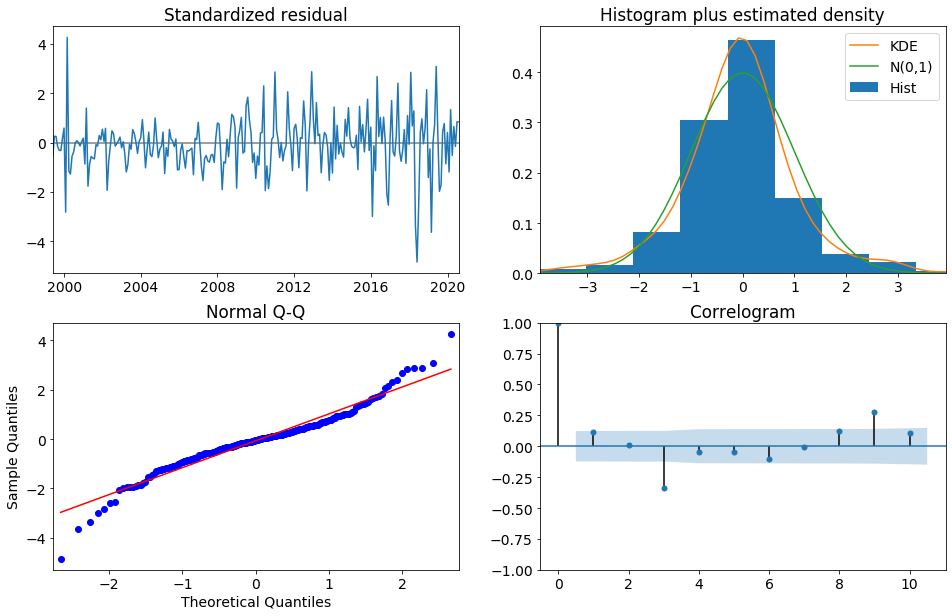

In [190]:
# West Hollywood modeled w/West Hollywood Model
output_weho = sarimax(WeHo, order=(0, 2, 1), seasonal_order=(1, 1, 2, 12))

### Model Century City

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  284
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood               -2450.543
Date:                            Fri, 25 Sep 2020   AIC                           4915.086
Time:                                    15:40:44   BIC                           4939.213
Sample:                                12-31-1996   HQIC                          4924.816
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8322      0.256      3.250      0.001       0.330       1.334
ar.L2         -0.1439      0.261   

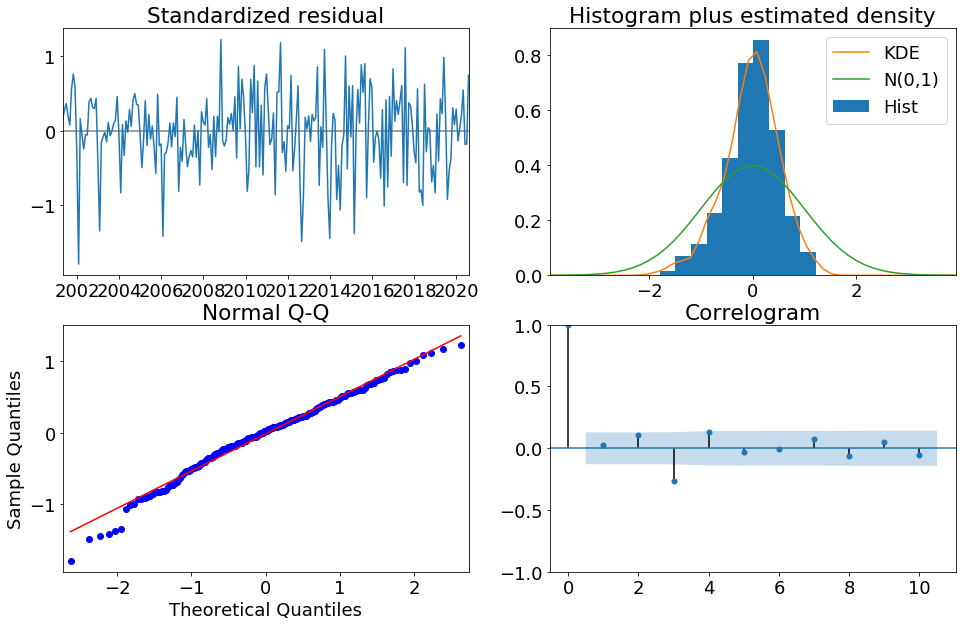

In [342]:
# Century City Modeled w/ LA - All Model 
output_centcity = sarimax(CentCity)

### Model LA Averaged

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood               -2379.510
Date:                            Mon, 21 Sep 2020   AIC                           4773.021
Time:                                    16:57:29   BIC                           4797.472
Sample:                                01-31-1996   HQIC                          4782.870
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6357      0.231      2.748      0.006       0.182       1.089
ar.L2          0.1116      0.164   

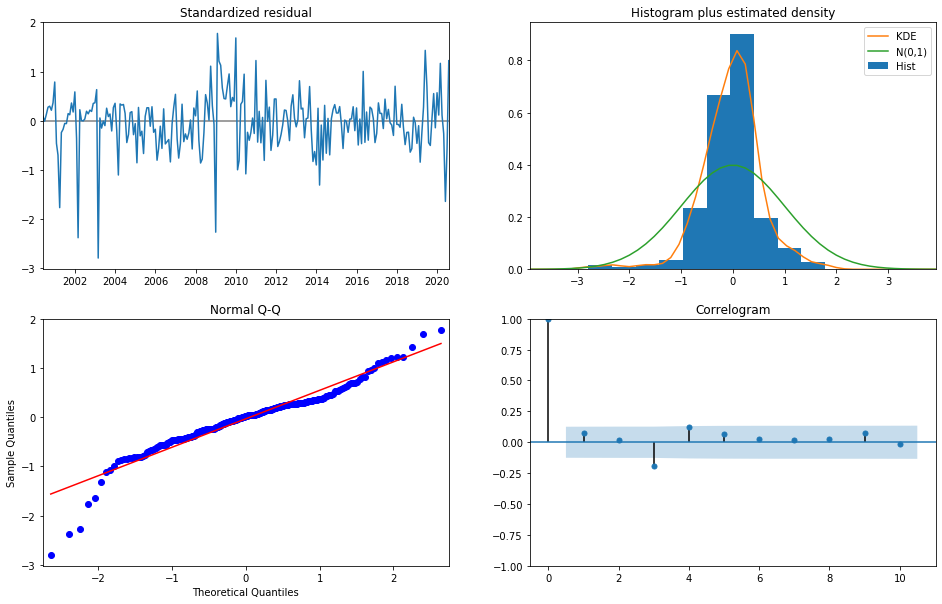

In [19]:
# LA - All Modeled w/ LA - All Model
output_la = sarimax(ts_LA)

### Observations & Discussion

**Normality**

The data and residuals look normally distributed, which is good. We can see the Q-Q plot for LA-Averaged may have some outliers, but it looks good for West Hollywood and Century City, and it this analysis we are looking at individual zip codes. 

**Correlogram & Seasonality**

We can see from the correlogram that there appears to be some negative correlation around 3 months for all three and positive correlation around 9 months for West Hollywood only. This makes sense as it demonstrates what we know about seasonality as previously discussed. 

The model is optimized to account for seasonality while minimizing BIC, so we'll keep it as is.

**Coefficients & Significance**

ar.L2 was not significant for WeHo, CentCity or LA-Averaged even though it resulted in the lowest BIC. I tested other combinations for parameters without much improvement. A note on this is that a slightly higher BIC that is more significant may result in a lower RMSE for our predictions. I will leave the model as is for now, and if it seems neccessary or helpful when we get to it, I can test others and see what the resulting RMSE for the predictions is.

## Test Model On Known Data

We're now going to test our model on known data by getting predictions as well as prediction confidence intervals. 

### One-step Ahead Forecast

In [335]:

def ose_forecast(ts, output, dynamic=False, city=''):
    '''
    Plot forecast with real and predicted data.
    
    Input:
        ts : Time series.
        output : SARIMAX model output.
        dynamic : Default dynamic=False. Selects if prediction style is
            one-step ahead or dynamic. 
        city : Name of city for plot title. 
        
    Output:
        Prints RMSE.
        Plots real vs. model predicted plot.
    '''

    # Get predictions starting from 01-31-1996 and calculate confidence intervals
    if dynamic:
        pred = output.get_prediction(start=pd.to_datetime('2018-01-31'), dynamic=True, full_results=True)
    else:
        pred = output.get_prediction(start=pd.to_datetime('2018-01-31'), dynamic=False)
        
    # Get the real and predicted values
    ts_predicted = pred.predicted_mean
    ts_real = ts['2018-01-31':].value
    
    # Calc RMSE
    mse = mean_squared_error(ts_real, ts_predicted)
    rmse = np.sqrt(mse)

    # Print RMSE
    print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

    # Confidence Intervals
    pred_conf = pred.conf_int()

    ### Plot real vs predicted w/ confidence intervals ###

    rcParams['figure.figsize'] = 12, 6

    # Plot observed values
    ax = ts['2017-01-31':].plot(label='observed')

    # Plot predicted values
    if dynamic:
        ts_predicted.plot(ax=ax, label='dynamic forecast')
    else:
        ts_predicted.plot(ax=ax, label='one-step ahead forecast', alpha=0.9)

    # Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='g', alpha=.3)

    if dynamic:
        ax.fill_betweenx(ax.get_ylim(), 
                         pd.to_datetime('2018-01-31'), 
                         ts_predicted.index[-1], 
                         alpha=.1, 
                         zorder=-1)
        
    # Title
    ax.set_title(city)

    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Median Home Value (USD)')

    # Add legend
    plt.legend()

    return plt.show()

**West Hollywood**

The RMSE of our forecasts is 4933.54


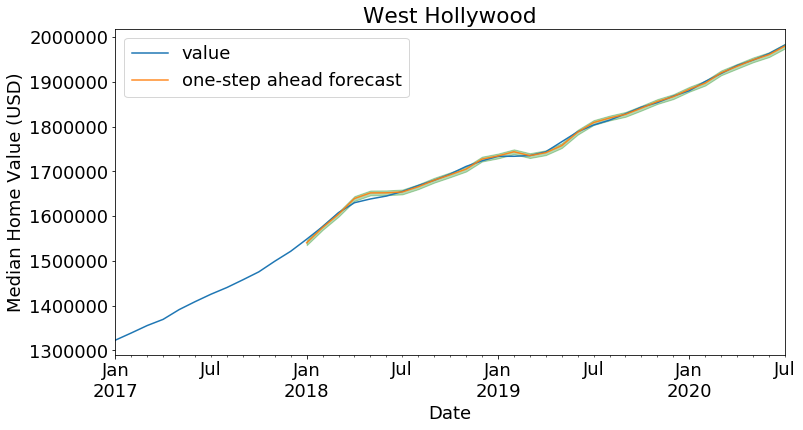

In [336]:
ose_forecast(WeHo, output_weho, city='West Hollywood')

**Los Angeles - All Averaged**

The RMSE of our forecasts is 3737.81


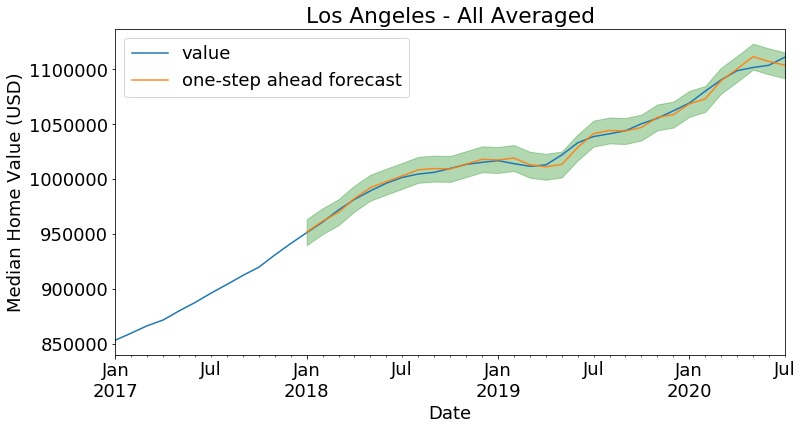

In [337]:
ose_forecast(ts_LA, output_la, city='Los Angeles - All Averaged')

We can see the confidence intervals for West Hollywood appear smaller than all of LA. However, this is due to the scale of the y-axis. We can see in both cases the confidence interval appears pretty small and the RMSE in both cases is great. We do however expect these to vary as the model is fit to zip codes it wasn't optimized on, but it still saves time over running our grid search 100 times for each individual zip code. 

## 5 Year Dynamic Forecast 

Define function to forecast 5 year predictions for home sale values. We will take a look at West Hollywood, then we will apply this function to our top 5 zip codes for a visual.

In [186]:
### Forecast 5 year predictions - Home Sale Values ###

def dynamic_forecast(ts, model_output, years=5, datestr='1996-01-31', y_label='Median Home Sale Value (USD)', zipcode=''):
    '''
    Plots dynamic forecast for specified time into the future.
    
    Inputs: 
        ts : Time series data.
        model_output : Output results from our model.
        years : n-years to forcast into the future.
        datestr : String to define x-axis start date. 
            Default is '1996-01-31'.
        y_label : String to define y-axis label. 
            Default is 'Median Home Sale Value (USD)'. 
            Could be different for example if forecasting 'ROI'.
            
    Outputs:
        Prints : Time series plot with one step ahead forecast.
        Returns : Dictionary of predictions.
    
    '''
    
    # Calcualte steps
    steps = years*12
    
    # Get forecast and confidence interval for steps ahead in future
    future = model_output.get_forecast(steps=steps, dynamic=True, full_results=True)
    future_conf = future.conf_int(steps=steps)
    
    ### Plot forecast ###
    
    # Observed
    ax = ts[datestr:].plot(label='Observed', figsize=(12, 6))
    # Predicted
    future.predicted_mean.plot(ax=ax, label='dynamic forecast', alpha=0.9)

    # Confidence Intervals
    ax.fill_between(future_conf.index,
                    future_conf.iloc[:, 0],
                    future_conf.iloc[:, 1], color='k', alpha=.25)
    
    # Title
    ax.set_title(f"5-Year Forecast for {zipcode}")
    
    # x & y-labels
    ax.set_xlabel('Date')
    ax.set_ylabel(y_label)
    
    # Legend
    ax.legend()
    
    # Print plot
    plt.show()

    # Forecast prediction for n-years into the future
    forecast = future.predicted_mean[-1]
    maximum = future_conf.iloc[-1,1]
    minimum = future_conf.iloc[-1,0]
    
    # Create dictionary of predictions
    predictions = {}
    predictions['forecast'] = forecast.round()
    predictions['minimum'] = minimum.round()
    predictions['maximum'] = maximum.round()
    
    return predictions

Output dynamic forecast for West Hollywood.

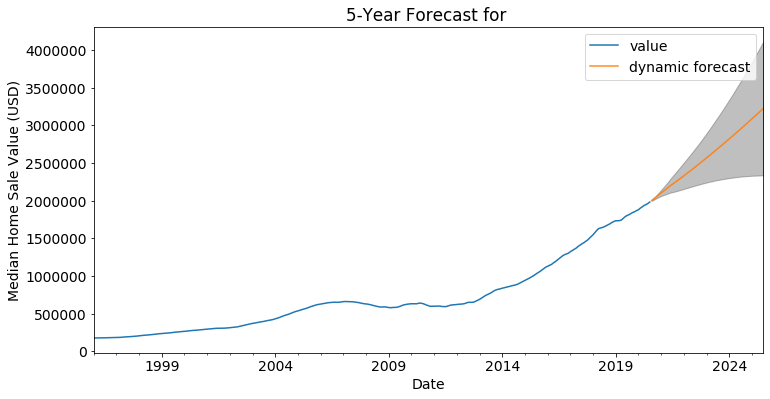

{'forecast': 3224231.0, 'minimum': 2334751.0, 'maximum': 4113711.0}

In [197]:
dynamic_forecast(WeHo, output_weho, years=5)

# Calculate 5 & 10 Year ROI

Since we are focusing on buy and hold, we're going to see which zip codes return the highest ROI for 5 & 10 years. A note is that we will also want to look at the rental market to compare the ratio of median home sale values to median home rental values as the rent to mortage ratio will play a roll in returns. I will put that in our future work. 

In [46]:
# Define function to calculate ROI ((profit/investment)*100) for 5 & 10 years
def calculate_ROI(ts):
    
    '''
    Input time series and calculate ROI for 5 & 10 year investments.
    Returns relevant time series with ROI as value. 
    
    '''
    # Calculate ROI ((current value - investment)/investment)*100
    
    roi_5yr = (ts - ts.shift(periods=60))/ts.shift(periods=60)*100
    roi_10yr = (ts - ts.shift(periods=120))/ts.shift(periods=120)*100
    
    roi_5yr.dropna(inplace=True)
    roi_10yr.dropna(inplace=True)
    
    # Return new time series
    
    return roi_5yr, roi_10yr

Calculate ROI for select zip codes plus LA-averaged.

In [47]:
### West Hollywood ###
weho_roi_5yr, weho_roi_10yr = calculate_ROI(WeHo)

### Century City ###
centcity_roi_5yr, centcity_roi_10yr = calculate_ROI(CentCity)

### Los Angeles - Averaged ###
la_roi_5yr, la_roi_10yr = calculate_ROI(ts_LA)

## Historic Rolling ROI

We will now take a look at historic rolling ROI data from our select zip codes, as well as all of our zipcodes averaged.

Note: This plot was inspired by and modified from https://medium.com/swlh/time-series-roi-based-analysis-on-a-real-estate-investment-7299dce242da.

In [228]:
# create visualization of  time series:

def plot_ROI(ts_5yr_roi, ts_10yr_roi, city=''):
    '''
    Plot ROI time series.
    
    Input:
        ts_5yr_roi : 5yr ROI time series.
        ts_10yr_roi : 10yr ROI time series.
        city : string to define city name for plot title. 
        
    Output:
        Returns plot showing 5 & 10 year ROI for ts data.
    '''
    # Define figure size
    plt.figure(figsize=(18,6))
    
    # Increase font
    matplotlib.rcParams.update({'font.size': 18})
    
    # Set axes
    ax = plt.subplot(111)  
    
    # Format axes
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    
    # Plot 5 yr ROI time series
    ax.plot(ts_5yr_roi, label='5 Year ROI', color='magenta')
    
    # Plot 10 yr ROI time series
    ax.plot(ts_10yr_roi, label='10 Year ROI', color='blue')
    
    # Fill confidence intervals
    ax.fill_between(ts_5yr_roi.index, ts_5yr_roi.value < 0, - 20, color='red', alpha=.2)
    
    # Title
    plt.title(f'5 & 10 Year ROI - {city}')
    
    # x & y labels
    ax.set_xlabel('Year')
    ax.set_ylabel('ROI')
    plt.yticks([-25,0,25,50,75,100,125,150,175,200,225,250,275], 
               [str(x) + "%" for x in [-25,0,25,50,75,100,125,150,175,200,225,250,275]], 
               fontsize=12)
    
    # Add grid for easy viewing
    ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
    
    # Add legend
    ax.legend()
    
    return plt.show()

Plot historic ROI for West Hollywood and Los Angeles with all zip codes averaged.

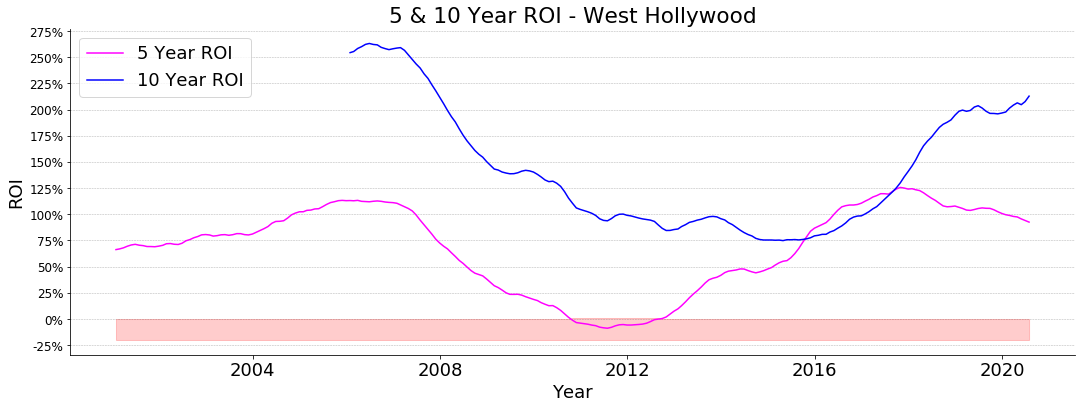

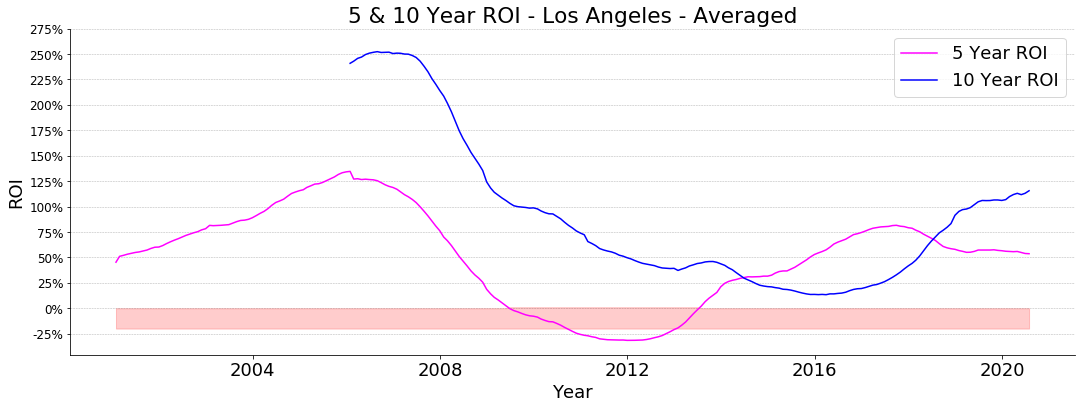

In [338]:
plot_ROI(weho_roi_5yr, weho_roi_10yr, city='West Hollywood')
plot_ROI(la_roi_5yr, la_roi_10yr, city='Los Angeles - Averaged')

We can see at the height of the bubble returns were looking good!

# 5 Year Projected ROI

Now let's take a look at projected ROI. Rather than projecting from the ROI time series above, I'm going to run projections on median home sale values in 5 years, then calculate the return on investment from that. I believe that is a more accurate way to calculate the ROI.

The ROI will be calculated based on investing now; what that investment would return in percentage in 5 years time. This is how it would actually be done, so this is why I'm calculating it this way.

In [168]:

def projections(zipcodes,ts,years):
    '''
    Calculate projections for each zip code.
        - Value
        - Profit
        - ROI (return on investment)
        
    Input:
        zipcodes : list of zip codes to iterate through.
        ts : time series data.
        years : n-number of years to forecast.
        
    Output:
        Returns dataframe with:
        - zip code
        - investment value
        - predicted value + 95% confidence intervals
        - predicted profit + 95% confidence intervals
        - predicted ROI + 95% confidence intervals

    '''
    
    # Define steps for forecasting
    steps = years*12
    
    # Create list to append projection metrics
    projections = []
    
    # Iterate through time series of each zip code
    for zipcode in zipcodes:
        
        # Time series of zip code
        ts_zipcode = ts[ts['RegionName'] == zipcode]   
        
        # Set index to time
        ts_zipcode.index = ts_zipcode['time']
        
        
        to_drop = ['RegionName','City','State','Metro','CountyName','time']
        ts_zipcode = ts_zipcode.drop(to_drop, axis=1)

        # Plug the optimal parameter values into a new SARIMAX model
        # I used the values from the lowest RMSE for West Hollywood
        SARIMAX_zipcode = sm.tsa.statespace.SARIMAX(ts_zipcode,
                                                    order=(0, 2, 1),
                                                    seasonal_order=(1, 1, 2, 12),
                                                    enforce_stationarity=False,
                                                    enforce_invertibility=False,
                                                    freq='M')

        # Fit the model and print results
        model_zipcode = SARIMAX_zipcode.fit()
    
        # Get forecast and confidence interval for steps ahead in future
        forecast_zipcode = model_zipcode.get_forecast(steps=steps, dynamic=True)
        conf_int_zipcode = forecast_zipcode.conf_int(steps=steps)

        # show prediction for end of step-period (in this case in 10 years future time)
        pred_mean = forecast_zipcode.predicted_mean[-1]
        pred_mean_min = conf_int_zipcode.iloc[-1,0]
        pred_mean_max = conf_int_zipcode.iloc[-1,1]
        
        # Last value of the time series - this will be used to calculate projected ROI
        invest_val = ts_zipcode['value'][-1]
        
        # ROI (Return on Investment) as Percentage
        ROI = (pred_mean-invest_val)/invest_val *100
        ROI_min =  (pred_mean_min-invest_val)/invest_val *100
        ROI_max =  (pred_mean_max-invest_val)/invest_val *100
        
        # Profit
        profit = pred_mean-invest_val
        profit_min = pred_mean_min-invest_val
        profit_max = pred_mean_max-invest_val
        
        # Create DataFrame with relevant data
        
        # Initiate empty dictionary
        predicted = {}
        # Zip code
        predicted['zipcode'] = zipcode
        # Predicted value
        predicted['predicted mean'] = pred_mean
        predicted['predicted mean min'] = pred_mean_min
        predicted['predicted mean max'] = pred_mean_max
        # Investment value
        predicted['investment value'] = invest_val
        # Profit w/conf intervals
        predicted['profit'] = profit
        predicted['profit min'] = profit_min
        predicted['profit max'] = profit_max
        # ROI w/conf intervals
        predicted['ROI'] = ROI
        predicted['ROI min'] = ROI_min
        predicted['ROI max'] = ROI_max

        # Append to list
        projections.append(predicted)
        
        # Return in DataFrame format     
    return pd.DataFrame.from_dict(projections)

## Get 5 Year Projections

In [169]:
zipcodes = df_LA_melt_sort['RegionName'].unique()

# Get 5 year projections for all LA zip codes
projections_5yr = projections(zipcodes, df_LA_melt_sort, 5)

## Sort Top 10 Zip Codes

Sort top 10 zip codes by relevant metrics.

In [170]:
### Sort top 10 ###

def top_zipcodes(df, by=['ROI'], top=10):
    '''
    Input projections dataframe.
    Returns top zip codes ranked by input metric.
    
    df : dataframe of calculated projections from projections function.
    by : metric to sort by.
    top : n number of zip codes to return.
    
    '''
    top_zipcodes = df.sort_values(by=by, axis=0, ascending=False)[0:top]
    return top_zipcodes

In [171]:
# by top value
top_10_value = top_zipcodes(projections_5yr, by=['predicted mean'], top=10)

# by highest profit
top_10_profit = top_zipcodes(projections_5yr, by=['profit'], top=10)

# by highest ROI
top_10_roi = top_zipcodes(projections_5yr, top=10)

top_10_roi

,zipcode,predicted mean,predicted mean min,predicted mean max,investment value,profit,profit min,profit max,ROI,ROI min,ROI max
52,90067,1.142625e+07,-6.137957e+07,8.423207e+07,1414845.0,1.001141e+07,-6.279441e+07,8.281723e+07,707.597504,-4438.253708,5853.448716
51,90066,4.832962e+06,4.145749e+05,9.251350e+06,1624438.0,3.208524e+06,-1.209863e+06,7.626912e+06,197.515964,-74.478871,469.510798
95,91602,3.698940e+06,1.184442e+06,6.213438e+06,1275036.0,2.423904e+06,-9.059441e+04,4.938402e+06,190.104723,-7.105243,387.314690
92,91423,3.641353e+06,6.027160e+05,6.679991e+06,1314146.0,2.327207e+06,-7.114300e+05,5.365845e+06,177.088950,-54.136298,408.314197
99,91607,2.891399e+06,5.328137e+05,5.249984e+06,1087783.0,1.803616e+06,-5.549693e+05,4.162201e+06,165.806599,-51.018384,382.631583
9,90012,2.055693e+06,3.769824e+05,3.734404e+06,776170.0,1.279523e+06,-3.991876e+05,2.958234e+06,164.850900,-51.430438,381.132238
7,90010,4.105536e+06,-1.243551e+07,2.064658e+07,1656265.0,2.449271e+06,-1.409178e+07,1.899032e+07,147.879202,-850.816545,1146.574949
83,91356,2.939499e+06,-8.019980e+05,6.680996e+06,1292149.0,1.647350e+06,-2.094147e+06,5.388847e+06,127.489182,-162.066988,417.045351
29,90034,3.443347e+06,3.564400e+05,6.530254e+06,1515853.0,1.927494e+06,-1.159413e+06,5.014401e+06,127.155739,-76.485848,330.797326
86,91401,1.887168e+06,3.707130e+05,3.403623e+06,880424.0,1.006744e+06,-5.097110e+05,2.523199e+06,114.347608,-57.893806,286.589022


Create function to output the above data in table format.

In [208]:
# Define function to return table of 5 year investment projections
def top_10_table(top_10_df):
    '''
    Takes in our DataFrame of projections and returns table with ROI 
        and confidence intervals.
    '''
    
    cols = ['zipcode', 
            'investment value',
            'predicted mean',
            'predicted mean min', 
            'predicted mean max', 
            'profit', 
            'profit min', 
            'profit max',
            'ROI', 
            'ROI min', 
            'ROI max',
           ]
    
    top_10_table = top_10_df[cols]
    top_10_table.index = np.arange(1, len(top_10_df) + 1)
    
    # Save to file
    top_10_table.to_csv("top_10_table.csv")
    
    return top_10_table

### Print Table of Top 10 Zip Code Metrics

Print out and save to file in csv format. Sorted by ROI.

In [209]:
top_10_table(top_10_roi)

,zipcode,investment value,predicted mean,predicted mean min,predicted mean max,profit,profit min,profit max,ROI,ROI min,ROI max
1,90067,1414845.0,1.142625e+07,-6.137957e+07,8.423207e+07,1.001141e+07,-6.279441e+07,8.281723e+07,707.597504,-4438.253708,5853.448716
2,90066,1624438.0,4.832962e+06,4.145749e+05,9.251350e+06,3.208524e+06,-1.209863e+06,7.626912e+06,197.515964,-74.478871,469.510798
3,91602,1275036.0,3.698940e+06,1.184442e+06,6.213438e+06,2.423904e+06,-9.059441e+04,4.938402e+06,190.104723,-7.105243,387.314690
4,91423,1314146.0,3.641353e+06,6.027160e+05,6.679991e+06,2.327207e+06,-7.114300e+05,5.365845e+06,177.088950,-54.136298,408.314197
5,91607,1087783.0,2.891399e+06,5.328137e+05,5.249984e+06,1.803616e+06,-5.549693e+05,4.162201e+06,165.806599,-51.018384,382.631583
6,90012,776170.0,2.055693e+06,3.769824e+05,3.734404e+06,1.279523e+06,-3.991876e+05,2.958234e+06,164.850900,-51.430438,381.132238
7,90010,1656265.0,4.105536e+06,-1.243551e+07,2.064658e+07,2.449271e+06,-1.409178e+07,1.899032e+07,147.879202,-850.816545,1146.574949
8,91356,1292149.0,2.939499e+06,-8.019980e+05,6.680996e+06,1.647350e+06,-2.094147e+06,5.388847e+06,127.489182,-162.066988,417.045351
9,90034,1515853.0,3.443347e+06,3.564400e+05,6.530254e+06,1.927494e+06,-1.159413e+06,5.014401e+06,127.155739,-76.485848,330.797326
10,91401,880424.0,1.887168e+06,3.707130e+05,3.403623e+06,1.006744e+06,-5.097110e+05,2.523199e+06,114.347608,-57.893806,286.589022


### Plot Top 10 Zip Codes

In [239]:
# Define function to plot top 10 zipcodes by selected metric
def plot_top_zipcodes(df, metric='ROI', save_fig=False):
    '''
    Plot top 10 zip codes by metric with 95% confidence intervals.
    
    Input: 
        df : DataFrame containing projected metrics.
        metric : Default='ROI'. Also takes 'predicted mean' and 'profit'.
        save_fig : Default=False. Save figure in *.png format.
        
    Output:
        Returns plot of top 10 zip codes by selected metric with 95%
        confidence intervals.
        
        If selected, saves figure as *.png.
    
    '''
    
    # Get errors; (pred mean - lower bound of conf interval)
    errors = df[metric] - df[f'{metric} min']
    
    # Append errors column to dataframe
    df['errors'] = errors

    ### Plot Predicted Mean Home Sale Values ###

    # x-labels
    variables = list(df.zipcode.values)
    
    # Add variables column to dataframe
    df['variables'] = variables

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Increase figure's font sizes
    matplotlib.rcParams.update({'font.size': 18})
    
    # Error bars for 95% confidence interval
    df.plot(x='variables', 
            y=metric, 
            kind='bar',
            ax=ax, 
            color='none', 
            ecolor='black',
            capsize=10,
            yerr='errors', 
            legend=False)
    
    if metric == 'ROI':
        
        # Set title & labels
        plt.title(f'{metric.upper()} - 5 Year - w/ 95% Confidence Intervals')
        ax.set_ylabel(f'{metric.upper()} (%)')               
        
    else:
        
        # Set title & labels
        plt.title(f'{metric.title()} - 5 Year - w/ 95% Confidence Intervals')
        ax.set_ylabel(f'{metric.title()} (USD)')
            
    ax.set_xlabel('Zip Code')
    
    # Predicted Mean Homesale Value
    ax.scatter(x=pd.np.arange(df.shape[0]),
               marker='s', 
               s=40, 
               y=df[metric], 
               color='black')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1.5)
    
    # Rotate zip code labels 45 degrees
    plt.xticks(rotation=45)
    
    if save_fig:
        plt.savefig(f'top_zipcodes_{metric}.png', dpi=500, orientation='landscape', bbox_inches='tight')
    
    return plt.show()


## Plot Top 10 Zip Codes

Plot top 10 zip codes ranked by **projected**:
- Value
- Profit
- ROI

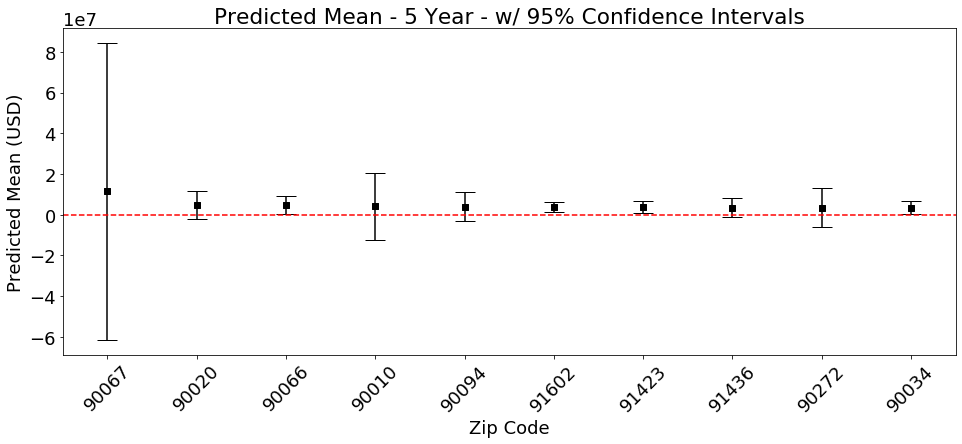

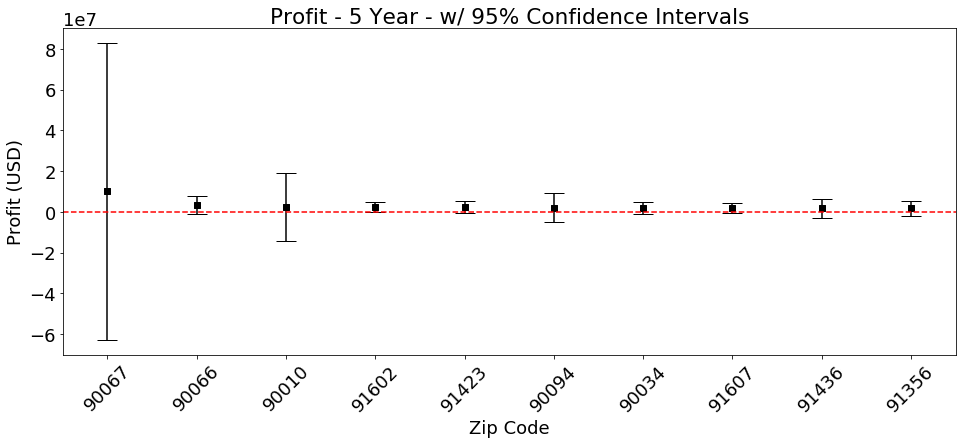

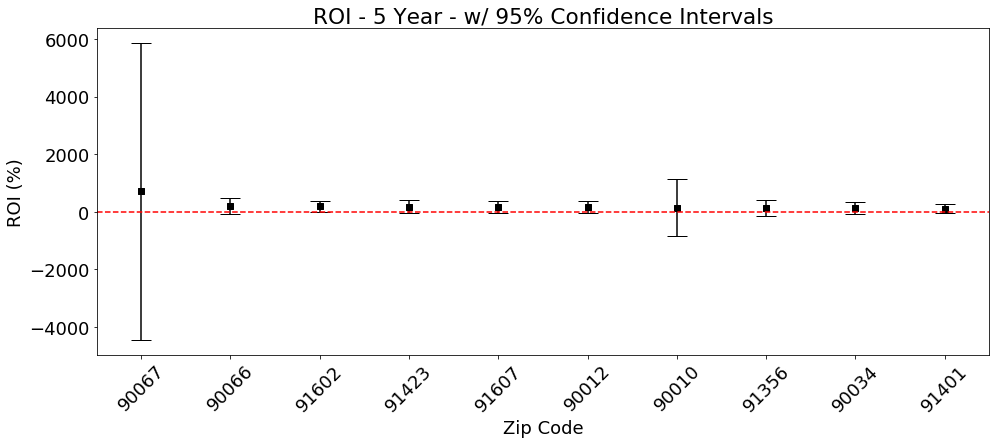

In [237]:
plot_top_zipcodes(top_10_value, metric='predicted mean')
plot_top_zipcodes(top_10_profit, metric='profit')
plot_top_zipcodes(top_10_roi)

## Remove 90067

Remove 90067 due to extremely large variability. This is due to there being more fluctuation in market values compared to some of the other zip codes.

Plot top 10 for **projected**:
- Value
- Profit

Plot top 5 for **projected**:
- ROI

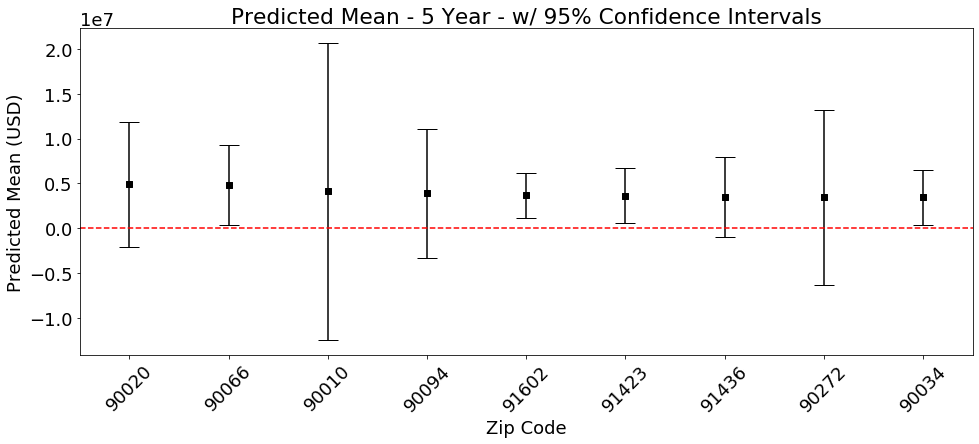

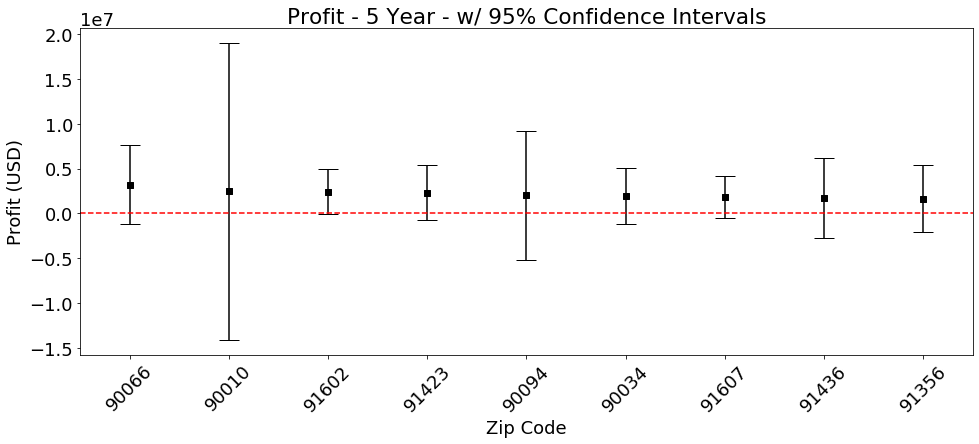

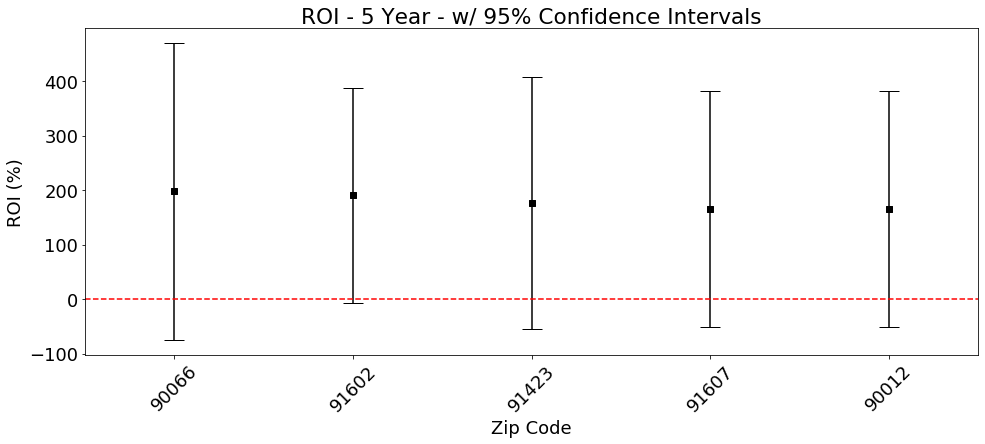

In [240]:
# Plot top 10 w/90067 removed
plot_top_zipcodes(top_10_value[1:11], metric='predicted mean')
plot_top_zipcodes(top_10_profit[1:11], metric='profit')

# Plot top 5 (90067 removed)
plot_top_zipcodes(top_10_roi[1:6], save_fig=True)

## Plot Historic Values for Top 5 Zip Codes

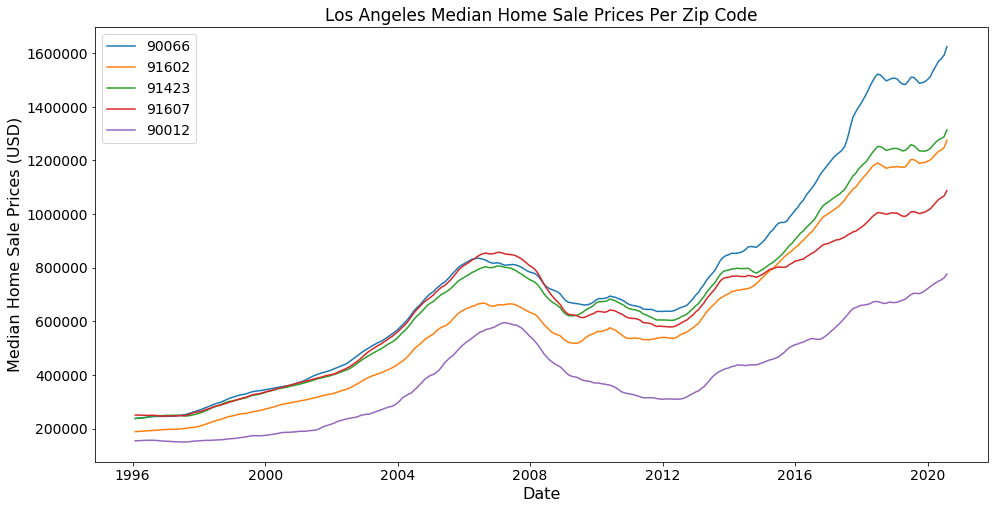

In [210]:
# Top 5 zip codes
top_5_zipcodes = [90066, 91602, 91423, 91607, 90012]

# Plot historic median home sale prices (1/31/1996 - 7/31/2020)
plot_zipcodes(df_LA_melt_sort, top_5_zipcodes, legend=True)

## Models & 5 Year Dynamic Forecast for Top 5 Zip Codes

Print out model results and dynamic 5 year forecast for top 5 zip codes.



                #####     Zip Code: 90066     #####


                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(0, 2, 1)x(1, 1, 2, 12)   Log Likelihood               -2537.383
Date:                            Fri, 25 Sep 2020   AIC                           5084.766
Time:                                    15:23:04   BIC                           5102.472
Sample:                                01-31-1996   HQIC                          5091.888
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1968      0.056      3.503      0.000    

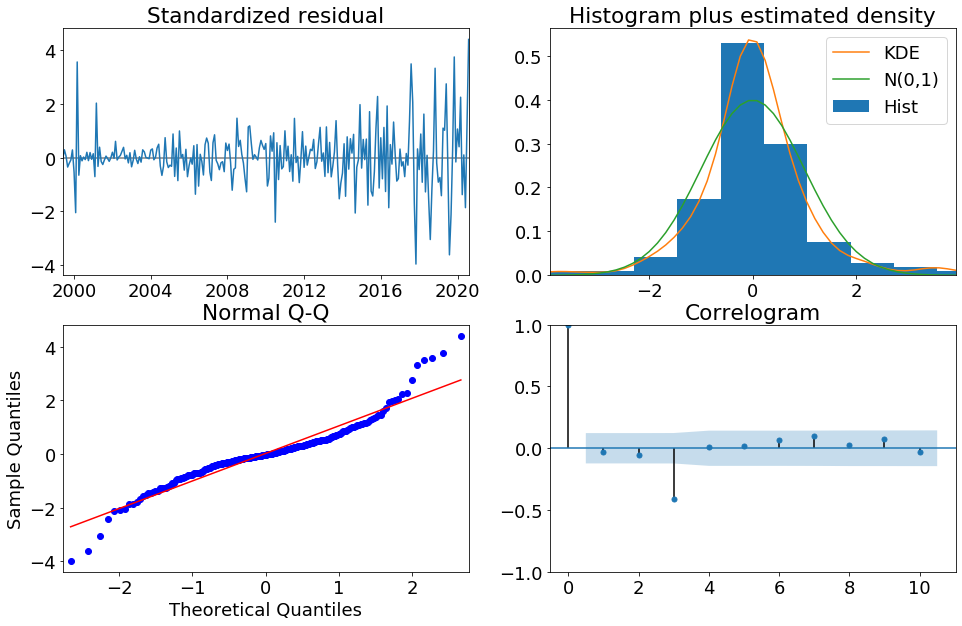

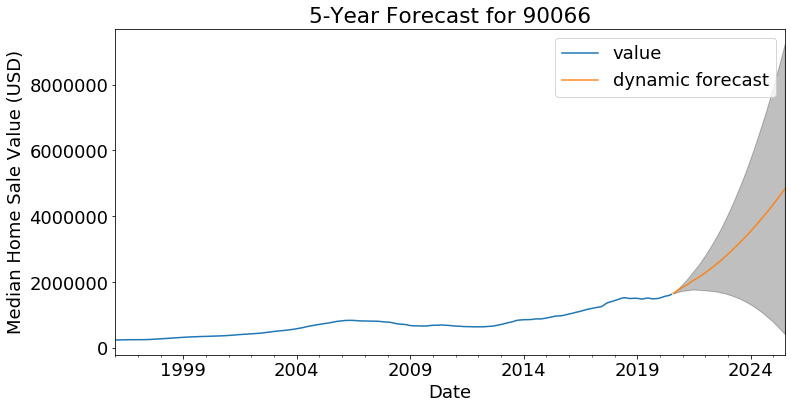



                #####     Zip Code: 91602     #####


                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(0, 2, 1)x(1, 1, 2, 12)   Log Likelihood               -2458.101
Date:                            Fri, 25 Sep 2020   AIC                           4926.203
Time:                                    15:23:12   BIC                           4943.909
Sample:                                01-31-1996   HQIC                          4933.325
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0688      0.076     -0.905      0.366    

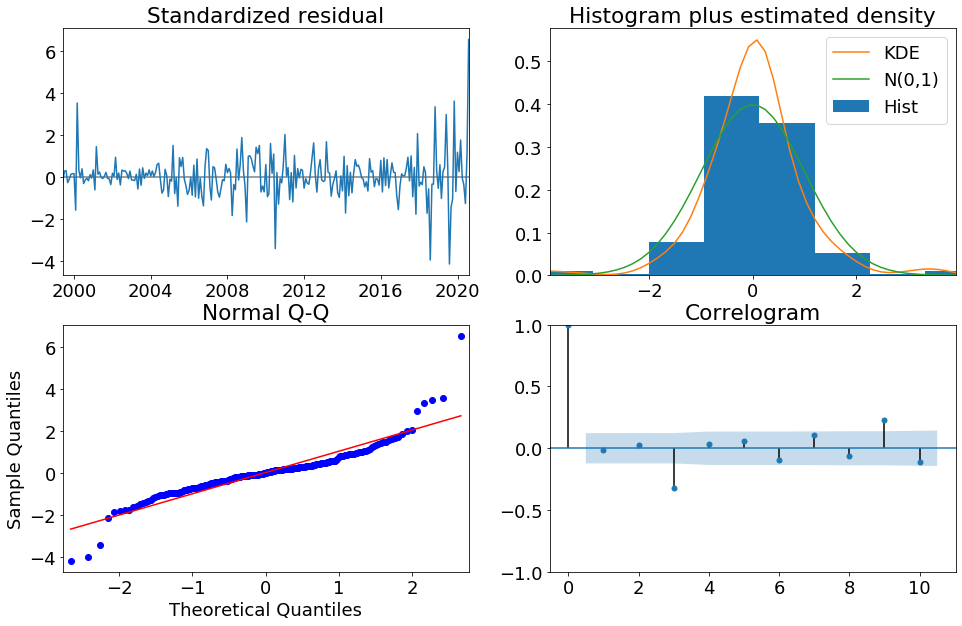

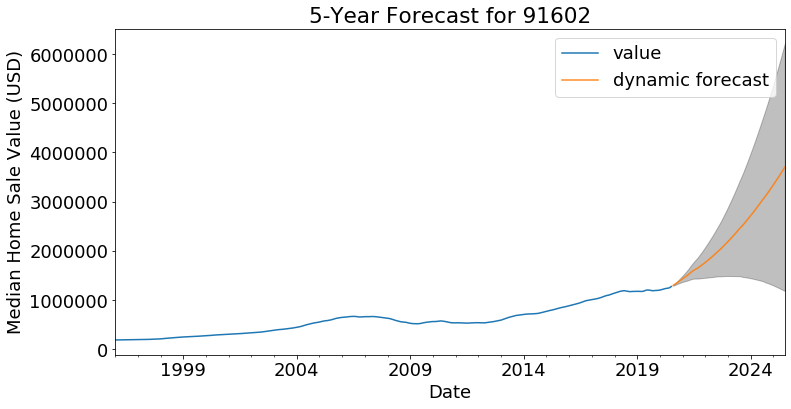



                #####     Zip Code: 91423     #####


                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(0, 2, 1)x(1, 1, 2, 12)   Log Likelihood               -2482.896
Date:                            Fri, 25 Sep 2020   AIC                           4975.793
Time:                                    15:23:21   BIC                           4993.499
Sample:                                01-31-1996   HQIC                          4982.915
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0119      0.067      0.177      0.860    

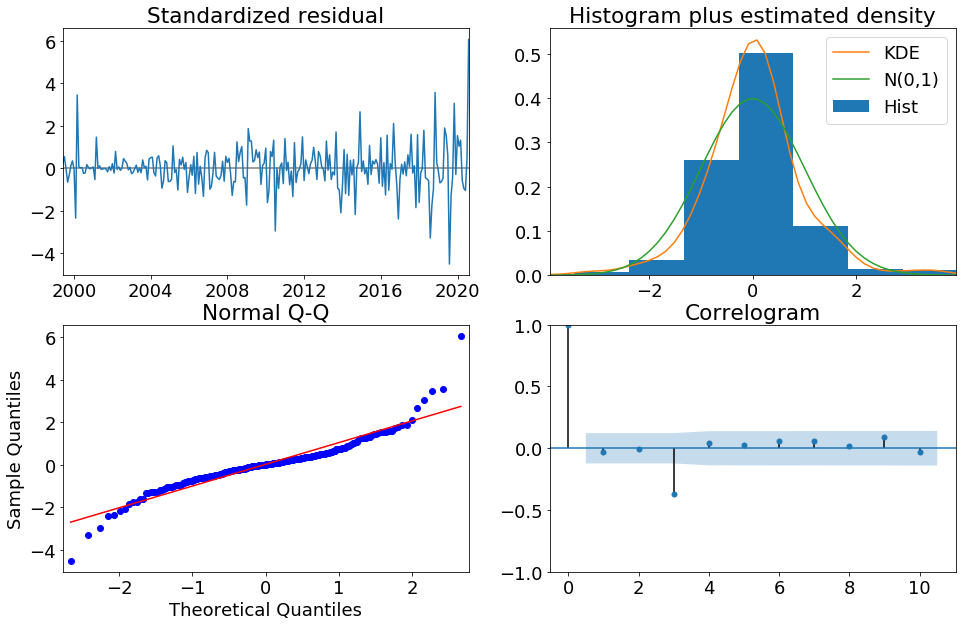

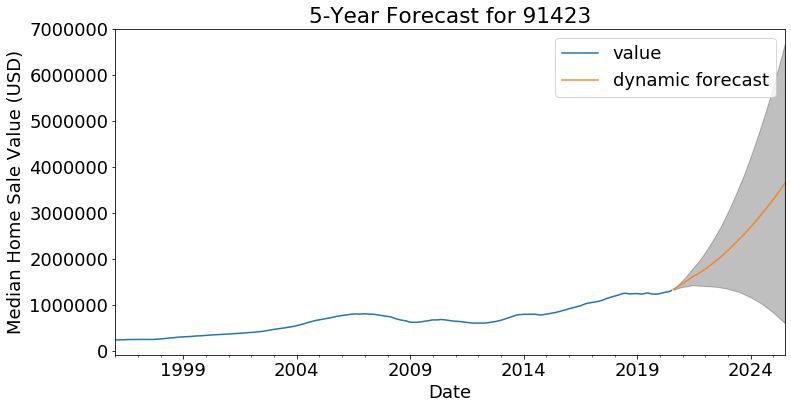



                #####     Zip Code: 91607     #####


                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(0, 2, 1)x(1, 1, 2, 12)   Log Likelihood               -2448.531
Date:                            Fri, 25 Sep 2020   AIC                           4907.062
Time:                                    15:23:29   BIC                           4924.768
Sample:                                01-31-1996   HQIC                          4914.184
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1086      0.064     -1.701      0.089    

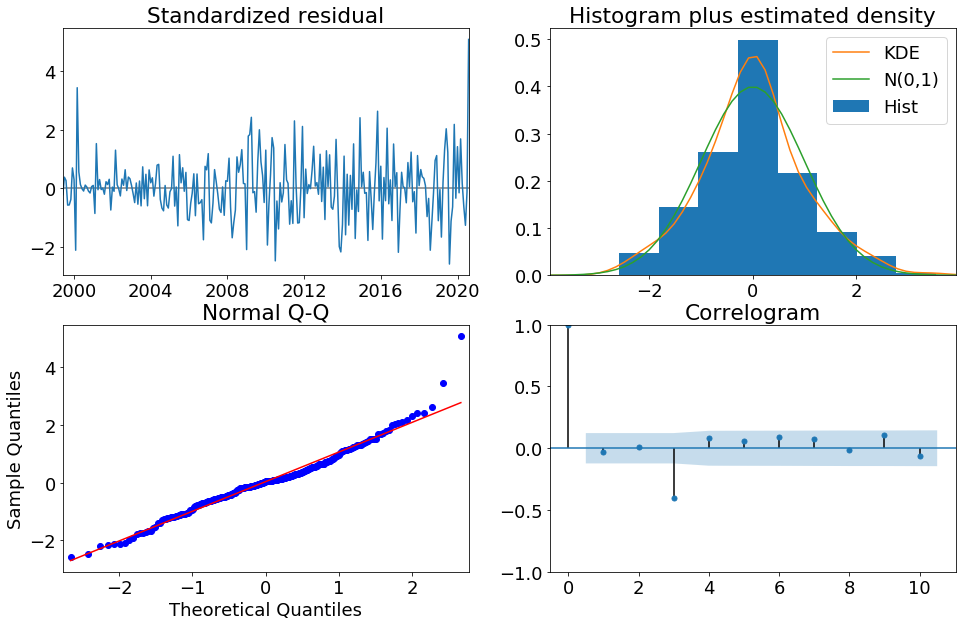

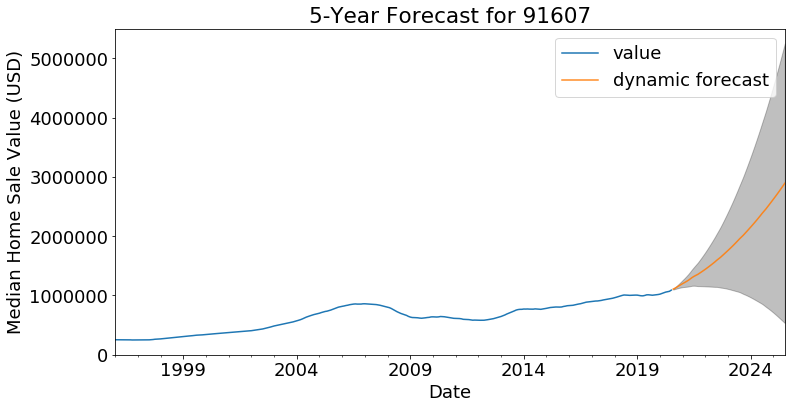



                #####     Zip Code: 90012     #####


                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(0, 2, 1)x(1, 1, 2, 12)   Log Likelihood               -2365.404
Date:                            Fri, 25 Sep 2020   AIC                           4740.809
Time:                                    15:23:34   BIC                           4758.515
Sample:                                01-31-1996   HQIC                          4747.931
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0349      0.069     -0.505      0.614    

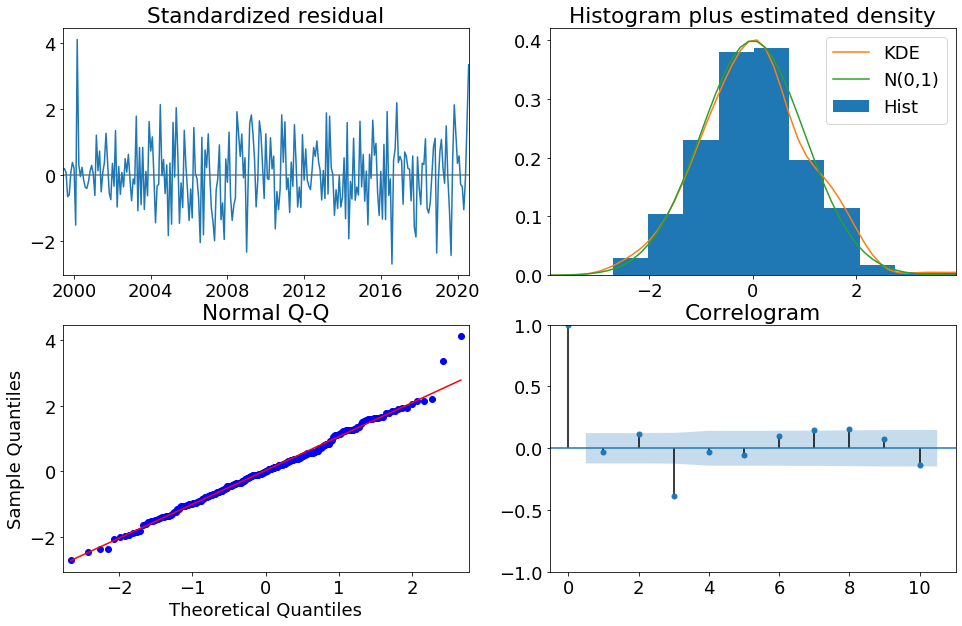

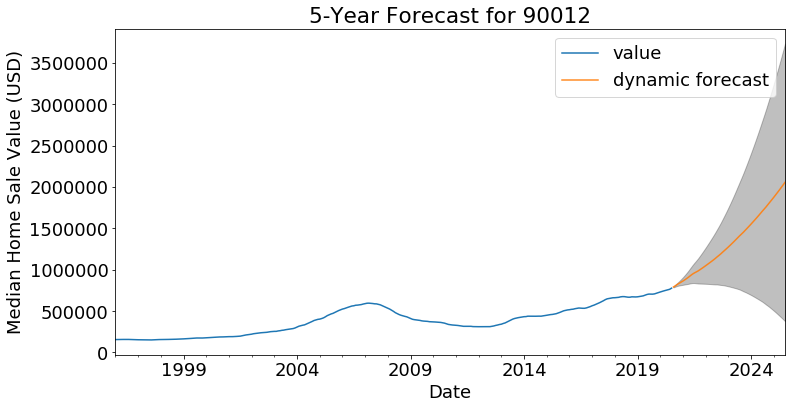

In [341]:
# Top 5 Zip Codes for further insights
top_5_zipcodes = [90066, 91602, 91423, 91607, 90012]

# Run loop to print model outputs and 5 year dynamic forcast for top 5 zip codes
for zipcode in top_5_zipcodes:
    print(f"\n\n                #####     Zip Code: {zipcode}     #####\n\n")
    zip_ts = zipcode_ts(df_LA_melt_sort, zipcode)
    output = sarimax(zip_ts, order=(0, 2, 1), seasonal_order=(1, 1, 2, 12))
    dynamic_forecast(zip_ts, output, zipcode=zipcode)

# Conclusion

## 5-Year Investment Projections

The 5-year projected values based off of median home sale investment at the current time for our top 10 zip codes.

In [207]:
top_10_table(top_10_roi)

,zipcode,investment value,predicted mean,predicted mean max,profit,profit min,profit max,ROI,ROI min,ROI max
1,90067,1414845.0,1.142625e+07,8.423207e+07,1.001141e+07,-6.279441e+07,8.281723e+07,707.597504,-4438.253708,5853.448716
2,90066,1624438.0,4.832962e+06,9.251350e+06,3.208524e+06,-1.209863e+06,7.626912e+06,197.515964,-74.478871,469.510798
3,91602,1275036.0,3.698940e+06,6.213438e+06,2.423904e+06,-9.059441e+04,4.938402e+06,190.104723,-7.105243,387.314690
4,91423,1314146.0,3.641353e+06,6.679991e+06,2.327207e+06,-7.114300e+05,5.365845e+06,177.088950,-54.136298,408.314197
5,91607,1087783.0,2.891399e+06,5.249984e+06,1.803616e+06,-5.549693e+05,4.162201e+06,165.806599,-51.018384,382.631583
6,90012,776170.0,2.055693e+06,3.734404e+06,1.279523e+06,-3.991876e+05,2.958234e+06,164.850900,-51.430438,381.132238
7,90010,1656265.0,4.105536e+06,2.064658e+07,2.449271e+06,-1.409178e+07,1.899032e+07,147.879202,-850.816545,1146.574949
8,91356,1292149.0,2.939499e+06,6.680996e+06,1.647350e+06,-2.094147e+06,5.388847e+06,127.489182,-162.066988,417.045351
9,90034,1515853.0,3.443347e+06,6.530254e+06,1.927494e+06,-1.159413e+06,5.014401e+06,127.155739,-76.485848,330.797326
10,91401,880424.0,1.887168e+06,3.403623e+06,1.006744e+06,-5.097110e+05,2.523199e+06,114.347608,-57.893806,286.589022


**Top 5 Zip Codes**

The top 5 zip codes ranked by highest return on investment (ROI) with the least amount of unpredictability (determined by confidence interval size):
- 90067: Century City (ranked 1st, but removed from plots due to high uncertainty)
- 90066: Mar Vista (bordering Playa Vista and Marina Del Rey)
- 91602: Toluca Lake and parts of Studio City (smallest variation - safest investment)
- 91423: Sherman Oaks
- 91607: Valley Village
- 90012: Chinatown/Downtown Los Angeles (slightly lower prices than the top 5) 

**Trend Among Zip Codes**

There was a noticeable trend amongst each of these top 5 zip codes, including the one that I removed due to its very large confidence intervals and therefore high unpredictability.

These neighborhoods all have \\$1-2M smaller homes with the larger homes for sale priced around \\$3-5M (Reference: Zillow.com). These are considered modest prices for Los Angeles. These are nice homes available in quaint, safe, nice neighborhoods. They're not the nicest, most expensive or luxurious neighborhoods, however they're also not areas undergoing gentrification or unsafe areas. 

They're considered more affordable communities for Los Angeles. And again, as Los Angeles continues to grow, these neighborhoods will only continue to increase in value, as they will become more in demand.

When it comes to real estate in highly desirable, densley populated cities, the most in demand real estate goes to the highest bidders, with the rest trickling down like a cascade. 

## Market Volatility & Considerations

Something to note is that real estate markets are somewhat unpredictable. There was a big housing bubble in 2008 that took a considerable amount of time for the real estate market to rebound from. There was some volatility in 2019 and we can see the housing market slowed to very little growth. 

Due to protections during the pandemic of 2020, such as mortgage forbearance, PPP loans and unemployment boosts, lower mortgage rates as incentives to buy, real estate prices have continued to rise. A bubble has been predicted to occur over the next couple of years, so that is something to consider.

With buy and hold strategy, if one can hold through a housing market crash and continue to rent, that is most ideal. This is because as we can see from the 2008 bubble, market value does eventually rebound. And during the housing bubble and recession, rental markets remained stronger than the housing markets. So having the continuing rental income to cover mortage over time while values rebound would be ideal, as well as locking in a fixed mortgage rate.

One could sell, but if not reinvesting would end up paying capital gains. It really is at the discretion of the investor, however, for the reasons discussed I would recommend holding and renting and/or investing in areas where the rental markets are strong.

## Recommendations

**Top 5 Zip Codes**

Based off of our projections and analysis, I recommend investing in zip codes 2-6, discussed above:
- 90066: Mar Vista (bordering Playa Vista and Marina Del Rey)
- 91602: Toluca Lake and parts of Studio City (2nd highest return & lowest relative risk)
- 91423: Sherman Oaks
- 91607: Valley Village
- 90012: Chinatown/Downtown Los Angeles

These offer the highest returns of all zip codes at around 165-200% return on investment (ROI) and have the least amount of variation among the top 9 zip codes. Mar Vista (90066) has slightly higher variation than the number 10 ranked zip code, but also with higher ROI. 

**Predicted Housing Bubble**

I recommend waiting to see if the housing market crashes post-pandemic or at least post-second stimulus package. If the rental market is predicted to be strong, I recommend investing in the above neighborhoods when market values are low or stable, depending on what happens in the coming months and into 2021. 

**Century City**

Century City is more uncertain due to market volatility, however the homes for sale are the same price range and style as the rest of the markets, so I would recommend doing more research on Century City before deciding to invest there. A new Westfield mall was built there, it has a nice wework and is considered up and coming, so the opportunity could be large. That being said, the risk could be larger as well. 

**Strong Rental Markets**

If looking to invest now, again, I recommend investing where the rental markets are strong and least likely to be affected by a pandemic-related housing bubble or recession. Since Los Angeles is affected by shut downs to the entertainment industry as well as tourism and the restaurant, nightlife and retail industries, it is best again to either wait and see, or invest in communities where rental markets are expected to remain strong. 

This leads us into our future work recommendations. 

## Future Work

**Rental Markets**

Zillow also has rental market data. For future work I recommend analyzing the rental market and comparing it to our top zip codes from our analysis, so we can determine which zip codes would have higher rent-to-mortgage ratios. This would also help us further determine the best zip codes to invest in, the best to protect against a possible housing bubble and/or recession, and the overall maximum return on investment. 